In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load YOLO
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

In [3]:
# Load COCO names
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

In [23]:
def detect_class(frame, class_name):
    height, width, channels = frame.shape

    blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    class_ids = []
    confidences = []
    boxes = []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5 and classes[class_id] == class_name:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = confidences[i]
            color = (0, 255, 0)
            cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
            cv2.putText(frame, f"{label} {confidence:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 2.0, color, 2)

    return frame

In [24]:
# Open the video file
#video_path = "traffic3.mp4"
video_path = "traffic4.mp4"
cap = cv2.VideoCapture(video_path)

In [25]:
# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
duration = frame_count / fps

In [26]:
print(f"Video duration: {duration:.2f} seconds")

Video duration: 27.44 seconds


In [28]:
while True:
    try:
        second_to_detect = float(input("Enter the second in the video to detect objects: "))
        if 0 <= second_to_detect <= duration:
            break
        else:
            print(f"Invalid input. Please enter a value between 0 and {duration:.2f} seconds.")
    except ValueError:
        print("Invalid input. Please enter a numeric value.")

Enter the second in the video to detect objects:  11


In [29]:
# Calculate the starting frame for the specified second
start_frame = int(second_to_detect * fps)

attempts = 0
max_attempts = 3

Attempt 1/3: Enter the number of frames to display (1 to 25):  1
Enter object class to detect (car, motorbike, bus, truck):  car


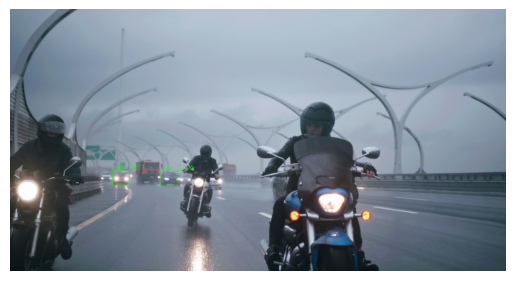

Attempt 2/3: Enter the number of frames to display (1 to 25):  1
Enter object class to detect (car, motorbike, bus, truck):  motorbike


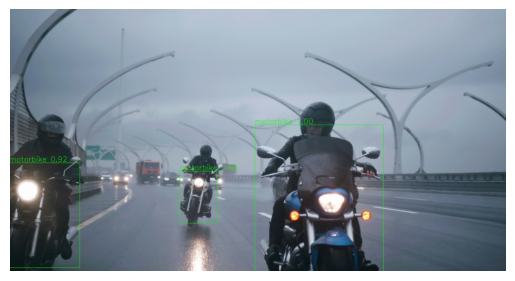

In [ ]:
    while attempts < max_attempts:
    # User input for the number of frames
        while True:
            try:
                num_frames = int(input(f"Attempt {attempts + 1}/{max_attempts}: Enter the number of frames to display (1 to {int(fps)}): "))
                if 1 <= num_frames <= int(fps):
                    break
                else:
                    print(f"Invalid input. Please enter a value between 1 and {int(fps)}.")
            except ValueError:
                print("Invalid input. Please enter a numeric value.")

        end_frame = start_frame + num_frames

    # User input for the class to detect
        class_to_detect = input(f"Enter object class to detect (car, motorbike, bus, truck): ")

        if class_to_detect.lower() in ["car", "motorbike", "bus", "truck"]:
            for frame_num in range(start_frame, end_frame):
                cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
                ret, frame = cap.read()
                if not ret:
                    break

                frame = detect_class(frame, class_to_detect.lower())
            
            # Display the frame using matplotlib
                rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                plt.imshow(rgb_frame)
                plt.axis('off')  # Hide axes
                plt.show()
        
            attempts += 1  # Increment attempt counter
        else:
            print("Invalid input. Please enter 'car', 'motorbike', 'bus', or 'truck'.")

cap.release()